***
____
![revit](https://i.ibb.co/bQ3dB8C/curso-revit.png)

***
***


# Clase 04
## Análisis de Componentes Principales

Empezamos a cargar las librerias que usaremos, en caso que no las tengamos primero las instalamos.

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} plotly

In [11]:
import pandas as pd
import numpy as np
import plotly as py
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = [8, 8]
np.random.seed(42)

In [ ]:
# Quizá sea necesario instalar nuevas librerías
#import sys
#!conda install --yes --prefix {sys.prefix} plotly

# Análisis de Componentes Principales (PCA)

Si bien el Análisis de Componentes Principales puede ser implementado de forma manual, ese no es el objetivo de esta clase, por lo cual usaremos la implementación del PCA `scikit-learn`

### Ejemplo 1: 

En este ejemplo manual vamos a usar el dataset de flores Iris, y aplicaremos PCA para reducir su dimensionalidad de 3 a 2 dimensiones

In [2]:
iris = pd.read_csv("../Dataset/clientes_cine.csv")

In [3]:
iris.head()

,cliente,edad,flag_visita_unica,indicador_frecuencia_find_semana,indicador_frecuencia_semana,indicador_genero_mas_visto,incidencia_personal_dulceria,Numero_entradas_compradas_moda,TP_boleteria,indicador_nro_visitas_mes,...,canal_venta_preferido,indicador_cliente_prime,indicador_cliente_xtreme,total_dulceria,total_boleteria,canti_visitas_periodo,tp_cliente_dulceria,PROMEDIO_ENTRADAS_COMPRADAS,Nro_entradas_totales_comprada,TP_dul_por_entrada
0,1,22,0,0.3333,0.6667,Terror,0.67,4,15.1667,1,...,Complejos,0.00,0.0,50.5,91.0,3,25.2500,2.00,12,4.21
1,2,46,0,0.2000,0.8000,Comedia,0.80,4,25.7500,1,...,Complejos,0.00,0.0,275.0,206.0,5,39.2857,2.75,22,12.50
2,3,34,0,0.3333,0.6667,Comedia,0.33,6,45.2500,0,...,Complejos,0.25,0.0,40.0,181.0,3,40.0000,2.75,11,3.64
3,4,24,1,0.0000,1.0000,Comedia,1.00,2,33.0000,1,...,Complejos,0.00,0.0,67.5,33.0,1,33.7500,2.00,2,33.75
4,5,18,1,0.0000,1.0000,Terror,0.00,2,29.0000,1,...,Complejos,0.00,0.0,0.0,29.0,1,0.0000,2.00,2,0.00


Usaremos el *endpoint* de *matplotlib notebook* para poder modificar la orientación de un gráfico en 3d de las 3 dimensiones del dataset que vamos a utilizar 

In [6]:
%matplotlib notebook

#### Paso 1 de PCA. Centrar los datos. 

Este paso consiste en restar a cada dimension (cada variable) su media. Vamos a eliminar la 4 variable del dataset para reducir de 3 dimensiones a 2 y poder hacerlo de forma gráfica

No siempre se puede plotear los datos, esto debido a la alta dimensionalidad que pueden llegar a posear nuestras tablas, por ello una herramienta importante y muy útil es el "correlograma"

In [6]:
iris.describe()

,cliente,edad,flag_visita_unica,indicador_frecuencia_find_semana,indicador_frecuencia_semana,incidencia_personal_dulceria,Numero_entradas_compradas_moda,TP_boleteria,indicador_nro_visitas_mes,indicador_estreno,...,indicador_upselling_combo,indicador_cliente_prime,indicador_cliente_xtreme,total_dulceria,total_boleteria,canti_visitas_periodo,tp_cliente_dulceria,PROMEDIO_ENTRADAS_COMPRADAS,Nro_entradas_totales_comprada,TP_dul_por_entrada
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,33.462000,0.292600,0.331068,0.668932,0.491699,2.519000,24.872816,0.246600,0.465255,...,0.369298,0.010069,0.008982,120.280770,183.268296,6.521600,22.351595,2.098055,16.324100,8.335967
std,2886.89568,10.732953,0.454979,0.352667,0.352667,0.384734,1.320005,14.032184,0.580881,0.351142,...,0.393588,0.074326,0.066029,209.709491,263.887584,9.483571,15.697459,0.890928,23.783537,10.279355
min,1.00000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,25.000000,0.000000,0.000000,0.500000,0.000000,2.000000,16.210700,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,39.500000,1.000000,11.000000,1.625000,4.000000,1.467500
50%,5000.50000,32.000000,0.000000,0.250000,0.750000,0.500000,2.000000,22.000000,0.000000,0.500000,...,0.250000,0.000000,0.000000,51.000000,89.000000,3.000000,25.000000,2.000000,8.000000,6.540000
75%,7500.25000,40.000000,1.000000,0.500000,1.000000,0.880000,3.000000,30.000000,0.000000,0.714300,...,0.692300,0.000000,0.000000,133.000000,210.500000,7.000000,31.333300,2.285700,18.000000,11.710000
max,10000.00000,97.000000,1.000000,1.000000,1.000000,1.000000,29.000000,315.000000,7.000000,1.000000,...,1.000000,1.000000,1.000000,4087.000000,3459.100000,113.000000,157.000000,29.000000,331.000000,186.000000


In [9]:
iris[iris.columns[0:24]].corr()

,cliente,edad,flag_visita_unica,indicador_frecuencia_find_semana,indicador_frecuencia_semana,incidencia_personal_dulceria,Numero_entradas_compradas_moda,TP_boleteria,indicador_nro_visitas_mes,indicador_estreno,...,indicador_upselling_combo,indicador_cliente_prime,indicador_cliente_xtreme,total_dulceria,total_boleteria,canti_visitas_periodo,tp_cliente_dulceria,PROMEDIO_ENTRADAS_COMPRADAS,Nro_entradas_totales_comprada,TP_dul_por_entrada
cliente,1.000000,-0.004723,0.014237,0.013733,-0.013733,0.003651,0.002289,-0.000754,-0.000020,-0.007199,...,-0.004722,0.002597,-0.002815,0.012437,0.006908,0.009928,0.003163,-0.004868,0.008816,-0.002937
edad,-0.004723,1.000000,0.020586,0.102689,-0.102689,-0.021682,0.051745,0.079562,0.002546,-0.067094,...,-0.004124,0.048657,-0.023220,0.001698,0.044277,-0.010395,-0.028425,-0.039979,0.003093,-0.032430
flag_visita_unica,0.014237,0.020586,1.000000,0.035712,-0.035712,-0.073537,0.123628,0.120273,-0.148546,-0.060515,...,-0.164524,-0.022070,0.002393,-0.297208,-0.364672,-0.374472,-0.232748,0.120337,-0.366503,0.084351
indicador_frecuencia_find_semana,0.013733,0.102689,0.035712,1.000000,-1.000000,0.007360,0.082312,0.192721,-0.025979,-0.061509,...,0.011291,0.002625,0.003626,-0.014257,0.019356,-0.051520,0.044726,-0.024622,-0.028921,0.013780
indicador_frecuencia_semana,-0.013733,-0.102689,-0.035712,-1.000000,1.000000,-0.007360,-0.082313,-0.192721,0.025979,0.061509,...,-0.011291,-0.002625,-0.003626,0.014259,-0.019355,0.051521,-0.044726,0.024622,0.028922,-0.013780
incidencia_personal_dulceria,0.003651,-0.021682,-0.073537,0.007360,-0.007360,1.000000,0.052945,0.037233,0.031034,0.009938,...,0.315572,0.034627,0.002392,0.314695,0.116465,0.078275,0.587095,0.012346,0.104413,0.493125
Numero_entradas_compradas_moda,0.002289,0.051745,0.123628,0.082312,-0.082313,0.052945,1.000000,0.410129,-0.003763,-0.024860,...,0.017384,-0.036528,0.004967,-0.046657,-0.030324,-0.166237,0.162749,0.630380,-0.028511,-0.091492
TP_boleteria,-0.000754,0.079562,0.120273,0.192721,-0.192721,0.037233,0.410129,1.000000,-0.033166,0.059189,...,0.033353,0.294856,0.043098,-0.023809,0.064036,-0.144713,0.169321,0.668372,-0.069259,0.025365
indicador_nro_visitas_mes,-0.000020,0.002546,-0.148546,-0.025979,0.025979,0.031034,-0.003763,-0.033166,1.000000,0.029231,...,0.043633,-0.003674,0.019511,0.052382,0.062162,0.055966,0.055155,-0.016023,0.067133,-0.007977
indicador_estreno,-0.007199,-0.067094,-0.060515,-0.061509,0.061509,0.009938,-0.024860,0.059189,0.029231,1.000000,...,0.008025,0.000925,0.061345,0.089885,0.099754,0.106210,0.011362,0.031779,0.096206,-0.016324


In [10]:
import seaborn as sns
%matplotlib inline

In [ ]:
sns.pairplot(iris[iris.columns[0:24]], hue = 'indicador_genero_mas_visto')

No es mala idea darnos una vuelta por la docuemntación del [seaborn](https://seaborn.pydata.org/index.html)

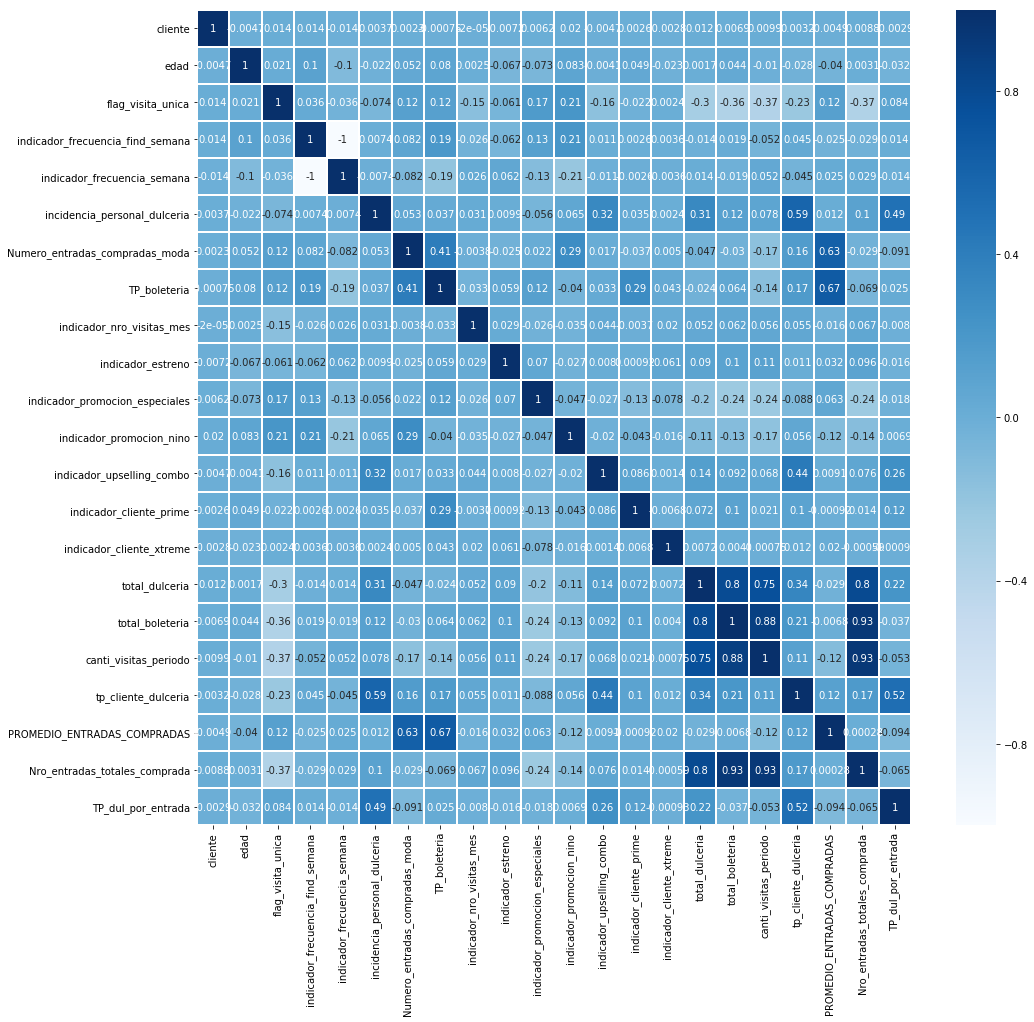

### Con la librería se **sklearn**

Recuerda que el PCA calcula distancias por lo cual es necesario que las variables esten en la misma escala

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

df = iris[['edad','indicador_frecuencia_semana','indicador_nro_visitas_mes','indicador_estreno','TP_dul_por_entrada','PROMEDIO_ENTRADAS_COMPRADAS']]

X = df.iloc[:,0:5].values
y = df.iloc[:,5].values
#X_std = StandardScaler().fit_transform(X)

scaler = MinMaxScaler(feature_range=[0, 1])
X_std = scaler.fit_transform(X)

In [32]:
pd.DataFrame(X_std).head()

,0,1,2,3,4
0,0.147727,0.6667,0.142857,0.3333,0.022634
1,0.420455,0.8000,0.142857,0.6000,0.067204
2,0.284091,0.6667,0.000000,0.0000,0.019570
3,0.170455,1.0000,0.142857,1.0000,0.181452
4,0.102273,1.0000,0.142857,1.0000,0.000000


In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
iris_pca = pca.fit_transform(X_std)

Podemos ver los componentes principales asi como su varianza explicada

In [34]:
pca.components_

array([[ 4.43881660e-02, -7.32497162e-01, -9.08791051e-03,
        -6.79253429e-01,  3.12858140e-03],
       [ 8.82716237e-03, -6.79648168e-01,  9.90186774e-04,
         7.33484328e-01, -4.57610398e-04],
       [ 9.98726149e-01,  3.84469353e-02,  9.77223459e-03,
         2.35798589e-02, -2.04060148e-02],
       [-9.53203780e-03, -6.38269262e-03,  9.99876715e-01,
        -7.15429543e-03, -7.98577477e-03]])

In [35]:
pca.explained_variance_ratio_

array([0.48337626, 0.4264717 , 0.05373545, 0.02523123])

Podemos ver las componentes que solicitamos

In [36]:
pd.DataFrame(iris_pca[:10]).head()

,0,1,2,3
0,0.084437,-0.096303,-0.131777,0.109992
1,-0.182116,0.011107,0.151107,0.104278
2,0.318174,-0.339710,-0.004780,-0.031738
3,-0.611056,0.166312,-0.083784,0.101610
4,-0.614651,0.165793,-0.148177,0.103709


In [46]:
fig = plt.figure(figsize=(12,12))
plt.scatter(iris_pca[:,1], iris_pca[:,4], c=df.PROMEDIO_ENTRADAS_COMPRADAS, 
            cmap=cm.Set3)
plt.title("Dataset Iris descompuesto en sus 2 primeros componentes principales (scikit-learn)", size=18)
plt.xlabel("Componente Principal 1", size=18)
plt.ylabel("Componente Principal 2", size=18);

IndexError: index 4 is out of bounds for axis 1 with size 4

<Figure size 864x864 with 0 Axes>

### Ejemplo 2


En este ejemplo vamos a hacer la implementación de scikit learn con escalado (Normalizado).

Vamos a usar el dataset del cancer de mama (Breast Cancer dataset)

En primer lugar cargamos los datos:


In [45]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [46]:
cancer.data.shape

(569, 30)

Posteriormente, tenemos que sustraerles la media, esto podemos hacerlo simplemente usando `sklearn.preprocessing.StandardScaler`, (recordad, el estandarizado resta la media y divide por la desviación estándar).

In [53]:
scalador.transform(cancer.data)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [65]:
from sklearn.preprocessing import StandardScaler

scalador = StandardScaler()
scalador.fit(cancer.data)
cancer_escalado = scalador.transform(cancer.data)

pca = PCA(n_components=10)
pca.fit(cancer_escalado)

cancer_pca = pca.transform(cancer_escalado)

In [71]:
pd.DataFrame(cancer_pca).head()

,0,1,2,3,4,5,6,7,8,9
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097375,0.024066,0.454274
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059567,-1.405440,-1.116977
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704


In [75]:
#pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881])

Text(0.5, 1.0, 'Varianza explicada')

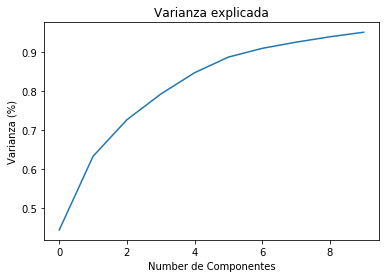

In [76]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number de Componentes')
plt.ylabel('Varianza (%)') #for each component
plt.title('Varianza explicada')

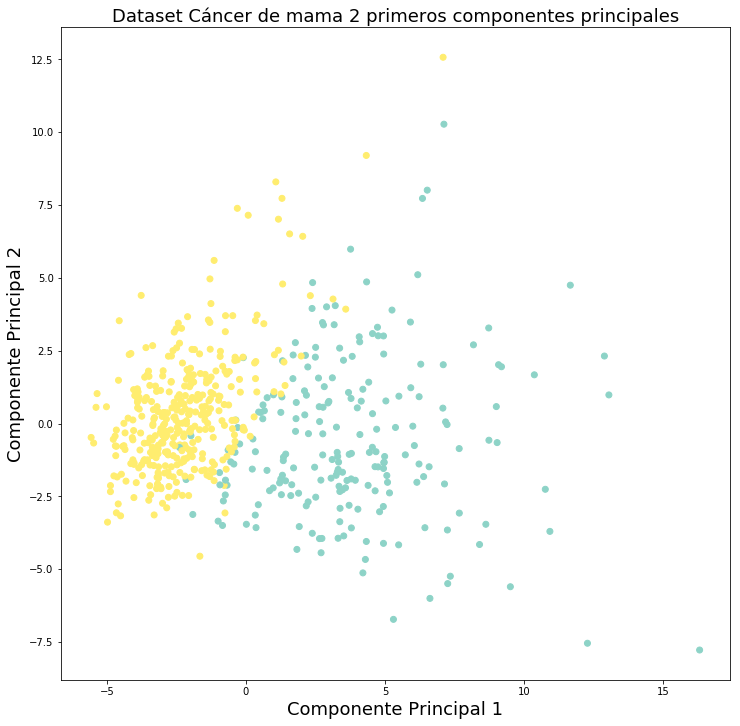

In [77]:
fig = plt.figure(figsize=(12,12))
plt.scatter(cancer_pca[:, 0], cancer_pca[:, 1], c=cancer.target, cmap=cm.Set3)
plt.title("Dataset Cáncer de mama 2 primeros componentes principales", size=18)
plt.xlabel("Componente Principal 1", size=18)
plt.ylabel("Componente Principal 2", size=18);

Vemos como reducir la dimensionalidad de 30 dimensiones a 2 componentes principales nos vale para separar la mayor parte de los cánceres en benignos y malignos.

Podemos usar el método del codo para ver que número de componentes es el óptimo

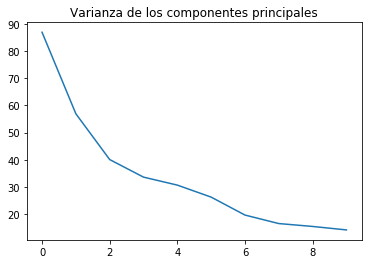

In [78]:
plt.plot(pca.singular_values_)
plt.title("Varianza de los componentes principales");

### Ejemplo 3

Hemos visto como usando el algoritmo PCA podemos separar prácticamente clases en datasets con una dimensionalidad alta. Vamos a ver ahora un ejemplo de uso de PCA para extraer conocimiento

Para ello, vamos a usar un dataset nuevo, el dataset contiene [información nutricional sobre alimentos](https://www.ars.usda.gov/northeast-area/beltsville-md/beltsville-human-nutrition-research-center/nutrient-data-laboratory/docs/sr28-download-files/) proporcionada por el departamento de agricultura de Estados Unidos (USDA).

Cargamos el dataset

In [79]:
alimentos = pd.read_csv("data/alimentos_usda.csv")
alimentos.head()

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_2,Refuse_Pct
0,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,...,0.0,0.0,7.0,51.368,21.021,3.043,215.0,5.00,14.2,0.0
1,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,...,0.0,0.0,4.6,45.390,19.874,3.331,225.0,3.80,9.4,0.0
2,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,...,0.0,0.0,8.6,61.924,28.732,3.694,256.0,12.80,205.0,0.0
3,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,...,0.5,21.0,2.4,18.669,7.778,0.800,75.0,28.35,17.0,0.0
4,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,...,0.5,22.0,2.5,18.764,8.598,0.784,94.0,132.00,113.0,0.0


In [80]:
alimentos.shape

(8790, 50)

Vemos que hay 50 variables nutricionales (contenido en vitaminas, grasas, hidratos de carbono, etc) para más de 8000 tipos de alimentos.

Vamos a usar scikit-learn para reducir su dimensionalidad y ver cual es la estructura de los datos en 2 dimensiones.

En primer lugar almacenamos el nombre de los alimentos en un array para mostrarlo luego en una visualización.

In [81]:
nombre_alimentos = alimentos.Shrt_Desc

In [82]:
alimentos_datos = StandardScaler().fit_transform(
    alimentos.drop("Shrt_Desc", axis=1).fillna(0)
)

C:\Users\Alfy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\Users\Alfy\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



Ahora calculamos la proyección de los valores nutricionales en sus 2 componentes principales.

In [83]:
alimentos_pca = PCA(n_components=2).fit_transform(alimentos_datos)

Vamos a usar Bokeh para hacer una visualización interactiva, para ello tenemos que convertir los valores en pca en un dataframe.

In [84]:
alimentos_pca_df = pd.DataFrame(alimentos_pca, columns=["PC1", "PC2"])
alimentos_pca_df["nombre"] = nombre_alimentos
alimentos_pca_df.head()

,PC1,PC2,nombre
0,0.010796,-6.015122,"BUTTER,WITH SALT"
1,-0.049275,-5.620096,"BUTTER,WHIPPED,W/ SALT"
2,0.295954,-7.609226,"BUTTER OIL,ANHYDROUS"
3,0.859281,-1.556728,"CHEESE,BLUE"
4,0.391486,-1.566674,"CHEESE,BRICK"


Cargamos bokeh

In [85]:
import sys
!conda install --yes --prefix {sys.prefix} bokeh

Solving environment: ...working... done

# All requested packages already installed.



In [86]:
from bokeh.io import output_notebook

from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.models import HoverTool

output_notebook()

Loading BokehJS ...

Ahora hacemos una visualización donde se muestren los datos en 2 dimensiones indicando el alimento en cuestión

In [87]:
source = ColumnDataSource(alimentos_pca_df)

hover = HoverTool(tooltips=[
    ("(x,y)", "($x, $y)"),
    ("nombre", "@nombre"),
])

p = figure(plot_width=800, plot_height=800, tools=[hover,"box_zoom", "pan", "zoom_out", "zoom_in"],
           title="2 Componentes Principales de Valores Nutritivos de alimentos")

p.circle('PC1', 'PC2', size=20, source=source, fill_alpha=0.5)

show(p);

Vemos que hay dos lineas de alimentos (cereales y carnes) claramente diferenciadas de los demás.

No estaría demás revisar [Bokeh](https://bokeh.pydata.org/en/latest/)